# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#From sklearn
from sklearn import metrics
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Data Analysis

In [ ]:
#Dataset
boston = load_boston()

#Changing the data to a panda's Dataframe
boston_df = pd.DataFrame(boston['data'] )
#Adding column names
boston_df.columns = boston['feature_names']
print(boston_df.shape)
boston_df.head()

(506, 13)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
#Adding the target as PRICE
boston_df['PRICE'] = boston['target']
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
#Checking for missing values
print(np.sum(np.isnan(boston_df)))

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64


In [ ]:
#data statistics
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
prices = boston_df['PRICE']

#Minimum price of the data
minimum_price = np.min(prices)*1000

#Maximum price of the data
maximum_price = np.max(prices)*1000

#Mean price of the data
mean_price = np.mean(prices)*1000

#Median price of the data
median_price = np.median(prices)*1000

#Standard deviation of prices of the data
std_price = np.std(prices)*1000

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n") 
print("Minimum price: ${:,.2f}".format(minimum_price))
print("Maximum price: ${:,.2f}".format(maximum_price))
print("Mean price: ${:,.2f}".format(mean_price))
print("Median price ${:,.2f}".format(median_price))
print("Standard deviation of prices: ${:,.2f}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $5,000.00
Maximum price: $50,000.00
Mean price: $22,532.81
Median price $21,200.00
Standard deviation of prices: $9,188.01


# Visualizing the Data

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


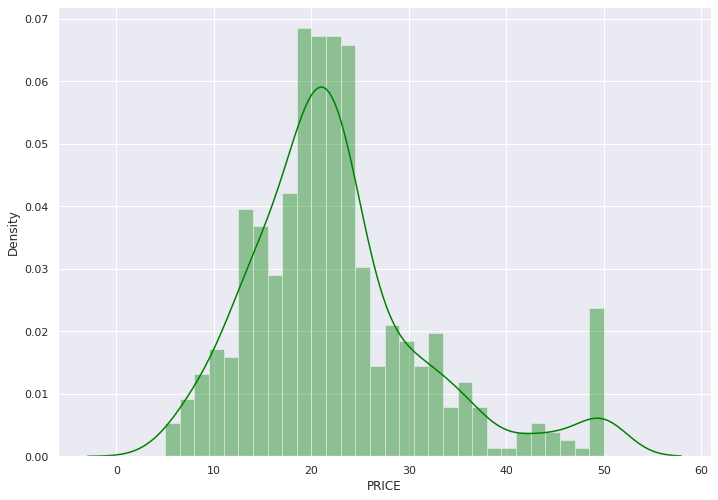

In [ ]:
# set the size of the figure
sns.set(rc={'figure.figsize':(11.7,8.27)})

# plot a histogram showing the distribution of the target values
sns.distplot(boston_df['PRICE'], bins=30, color = 'green')
plt.show()

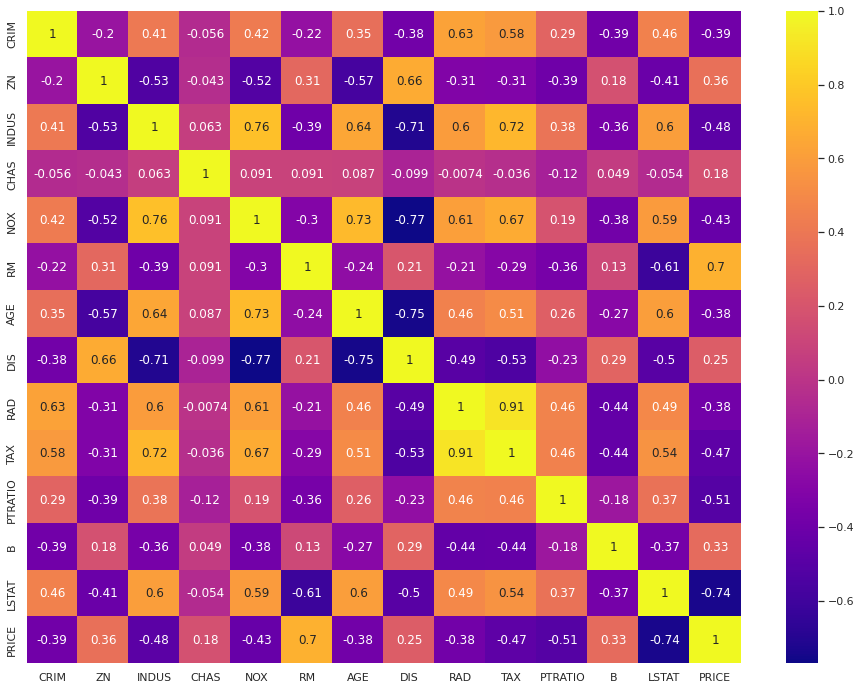

In [ ]:
#Finding out the correlation between the features
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
sns.heatmap(boston_df.corr(),annot=True,cmap ='plasma')

### Feature Selection

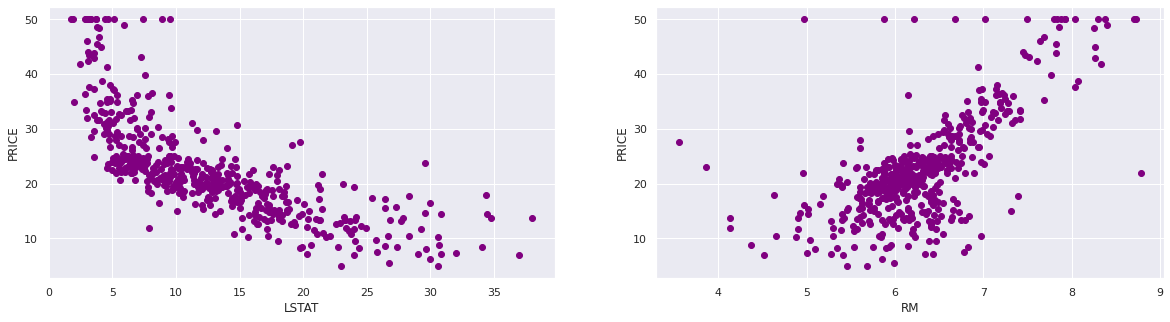

In [ ]:
plt.figure(figsize=(20, 5))

features = ['LSTAT','RM']
target = boston_df['PRICE']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston_df[col]
    y = target
    plt.scatter(x, y, marker='o', color = "purple")
    plt.xlabel(col)
    plt.ylabel('PRICE')

In [ ]:
boston_features = boston_df[['LSTAT','RM']]
boston_features.head()
data = boston_df[['LSTAT','RM','PRICE']]

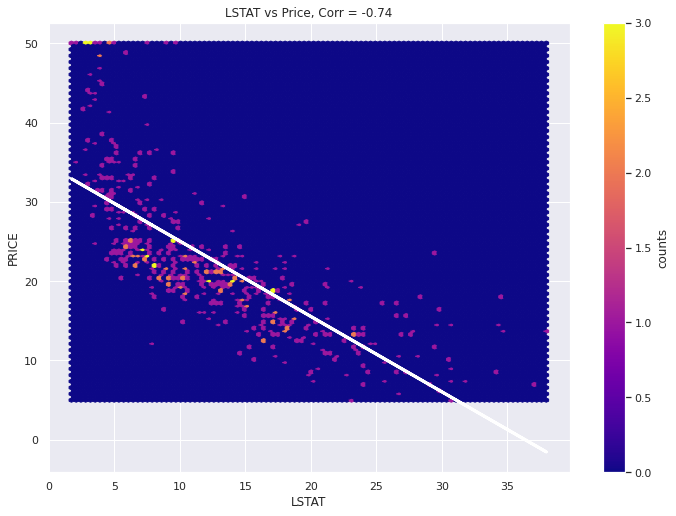

<Figure size 842.4x595.44 with 0 Axes>

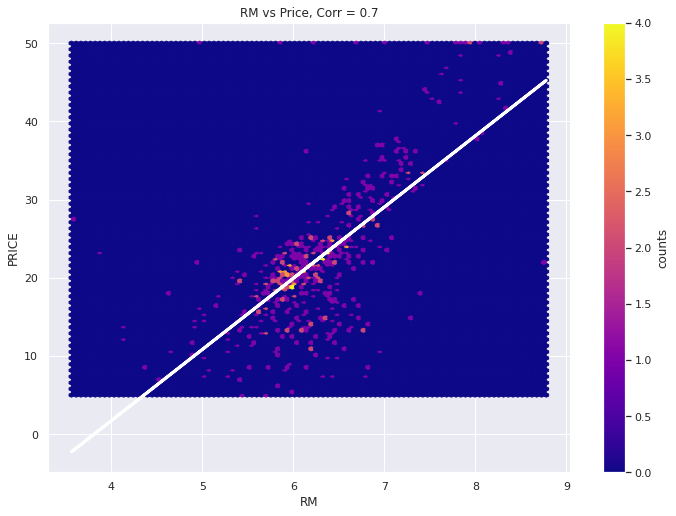

<Figure size 842.4x595.44 with 0 Axes>

In [ ]:
from scipy.stats.stats import pearsonr


for feature in boston_features:
    fig = plt.figure()
    ax = plt.subplot(111)
    corr, _ = pearsonr(boston_features[feature], prices)
    fit = np.polyfit(boston_features[feature], prices, deg=1) # We use a linear fit to compute the trendline
    
    plt.title('{} vs Price, Corr = {}'.format(feature, round(corr, 2)))
    hb = ax.hexbin(data[feature], prices, cmap='plasma')
    ax.plot(boston_features[feature], fit[0] * boston_features[feature] + fit[1], color='white', linewidth=3)
    #plt.scatter(data[feature], prices)
    plt.xlabel(feature)
    plt.ylabel('PRICE')
    cb = fig.colorbar(hb, ax=ax)
    cb.set_label('counts')
    plt.show()
    plt.savefig('plot.png')

# Train-Test Split

In [ ]:
X = boston_features
Y = boston_df['PRICE']

#Scaling
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_scaled = pd.DataFrame(data = X_scaled, columns = X.columns)
X = X_scaled



X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(404, 2) (102, 2) (404,) (102,)


# SVM Regression

**Parameters**

C : float, optional (default=1.0): The penalty parameter of the error term. It controls the trade off between smooth decision boundary and classifying the training points correctly.

kernel : string, optional (default='rbf’): kernel parameters selects the type of hyperplane used to separate the data. It must be one of 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed’ or a callable.

degree : int, optional (default=3): Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.

gamma : float, optional (default='auto’): It is for non linear hyperplanes. The higher the gamma value it tries to exactly fit the training data set. Current default is 'auto' which uses 1 / n_features.

coef0 : float, optional (default=0.0): Independent term in kernel function. It is only significant in 'poly' and 'sigmoid'.

shrinking : boolean, optional (default=True): Whether to use the shrinking heuristic.

### RBF Kernel

In [ ]:
#fitting model with default settings

model = SVR()
model.fit(X_train,Y_train)

SVR()

In [ ]:
y_pred = model.predict(X_test)

# Model Evaluation
print('R^2:',metrics.r2_score(Y_test, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(Y_test, y_pred))*(len(Y_test)-1)/(len(Y_test)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(Y_test, y_pred))
print('MSE:',metrics.mean_squared_error(Y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

R^2: 0.7663497968152719
Adjusted R^2: 0.7616295906903279
MAE: 3.078653829571178
MSE: 18.293378330888512
RMSE: 4.277075908946264


### Linear Kernel

In [ ]:
linear_model = SVR(kernel = "linear")
linear_model.fit(X_train,Y_train)

SVR(kernel='linear')

In [ ]:
linear_pred = linear_model.predict(X_test)

# Model Evaluation
print('R^2:',metrics.r2_score(Y_test, linear_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(Y_test, linear_pred))*(len(Y_test)-1)/(len(Y_test)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(Y_test, linear_pred))
print('MSE:',metrics.mean_squared_error(Y_test, linear_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test, linear_pred)))

                                   
                                

R^2: 0.67037400634427
Adjusted R^2: 0.6637148953613259
MAE: 3.6127174959367467
MSE: 25.807694268820818
RMSE: 5.080127387066275


### Poly Kernel

In [ ]:
poly_model = SVR(kernel = "poly")
poly_model.fit(X_train,Y_train)

SVR(kernel='poly')

In [ ]:
poly_pred = poly_model.predict(X_test)

# Model Evaluation
print('R^2:',metrics.r2_score(Y_test, poly_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(Y_test, poly_pred))*(len(Y_test)-1)/(len(Y_test)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(Y_test, poly_pred))
print('MSE:',metrics.mean_squared_error(Y_test, poly_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test, poly_pred)))


R^2: 0.4131662061484317
Adjusted R^2: 0.4013109779898141
MAE: 4.722712211821714
MSE: 45.94548800708705
RMSE: 6.778310114408093


# Visualization

### Plotting different SVM Kernels

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  "X does not have valid feature names, but"


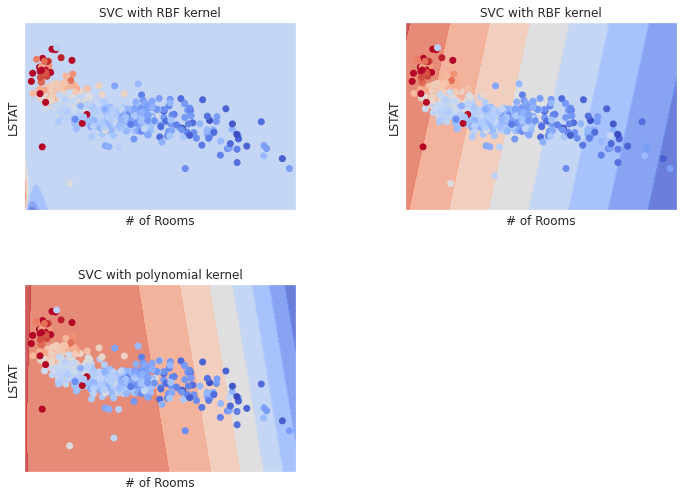

In [ ]:
# create a mesh to plot in
h = 0.2
x_min, x_max = boston_features.iloc[:, 0].min() - 1, boston_features.iloc[:, 0].max() + 1
y_min, y_max = boston_features.iloc[:, 1].min() - 1, boston_features.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with RBF kernel',
          'SVC with RBF kernel',
          'SVC with polynomial kernel']


for i, clf in enumerate((model,linear_model,poly_model)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(boston_features.iloc[:, 0], boston_features.iloc[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('# of Rooms')
    plt.ylabel('LSTAT')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

### Plotting Support Vectors

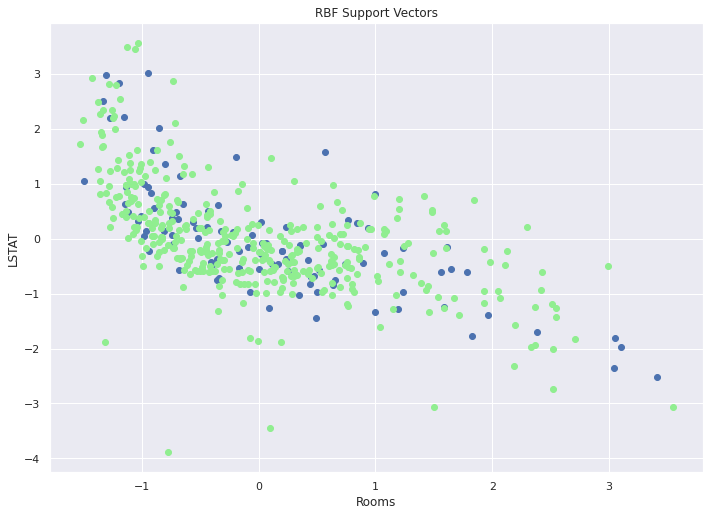

In [ ]:
support_vectors = model.support_vectors_

# Visualize support vectors
plt.scatter(X_test.iloc[:,0], X_test.iloc[:,1])
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='lightgreen')
plt.title('RBF Support Vectors')
plt.xlabel('Rooms')
plt.ylabel('LSTAT')
plt.show()

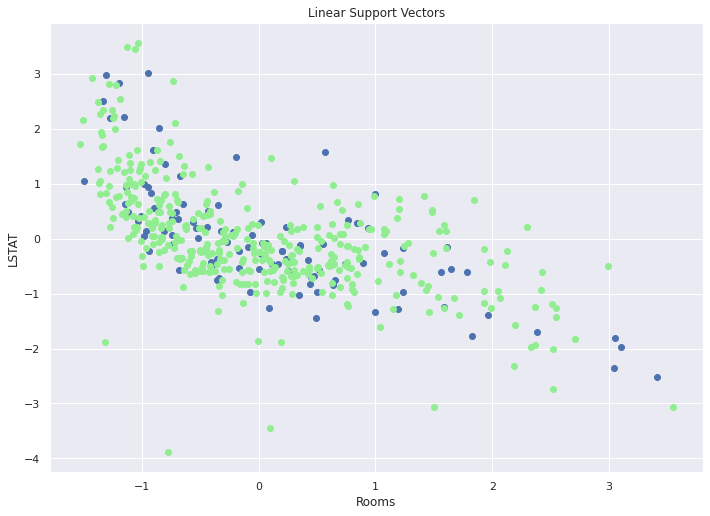

In [ ]:
linear_support_vectors = linear_model.support_vectors_

# Visualize support vectors
plt.scatter(X_test.iloc[:,0], X_test.iloc[:,1])
plt.scatter(linear_support_vectors[:,0], linear_support_vectors[:,1], color='lightgreen')
plt.title('Linear Support Vectors')
plt.xlabel('Rooms')
plt.ylabel('LSTAT')
plt.show()

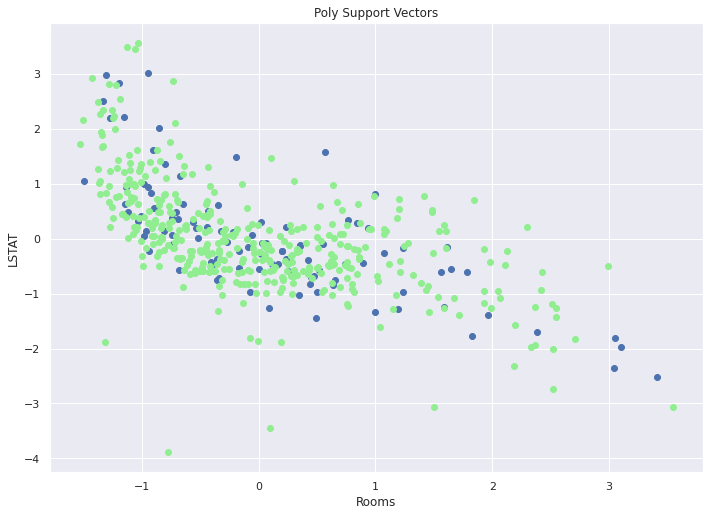

In [ ]:
poly_support_vectors = poly_model.support_vectors_

# Visualize support vectors
plt.scatter(X_test.iloc[:,0], X_test.iloc[:,1])
plt.scatter(poly_support_vectors[:,0], poly_support_vectors[:,1], color='lightgreen')
plt.title('Poly Support Vectors')
plt.xlabel('Rooms')
plt.ylabel('LSTAT')
plt.show()

# Comparing Kernels

**R^2** : It is a measure of the linear relationship between X and Y. It is the measure of how close the data is fit to the regression line.

**Adjusted R^2** :The adjusted R-squared is a modified form of R-squared that has been adjusted for the number of predictors.

**MAE** : It is the mean of the absolute value of the errors. The absolute value of errors is the distance between the predicted values and the true values.

**MSE**: The mean square error (MSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value. 

**RMSE**: The root mean squared error (RMSE) is the square root of MSE

In [ ]:
df = pd.DataFrame(
    {'Adjusted R^2': [0.76,0.66,0.40],
    'R^2': [0.76,0.67,0.41],
    'MAE': [3.07,3.61,4.72],
    'MSE': [18.29,25.8,45.94],
    'RMSE': [4.27,5.08,6.77]}, index = ['RBF Kernel','Linear Kernel','Poly Kernel']
)
df

,Adjusted R^2,R^2,MAE,MSE,RMSE
RBF Kernel,0.76,0.76,3.07,18.29,4.27
Linear Kernel,0.66,0.67,3.61,25.80,5.08
Poly Kernel,0.40,0.41,4.72,45.94,6.77


The RBF kernel has the lowest MAE and MSE

# Varied C

In [ ]:
test_mae_list = []
perc_within_eps_list = []

eps = 5
c_space = np.linspace(0.01, 10)

for c in c_space:
    varied_svr = SVR(epsilon = eps, C = c, max_iter = 10000)
    varied_svr.fit(X_train, Y_train)
    
    test_mae = mean_absolute_error(Y_test, varied_svr.predict(X_test))
    test_mae_list.append(test_mae)
    
    perc_within_eps = 100*np.sum(abs(Y_test-varied_svr.predict(X_test)) <= eps) / len(Y_test)
    perc_within_eps_list.append(perc_within_eps)

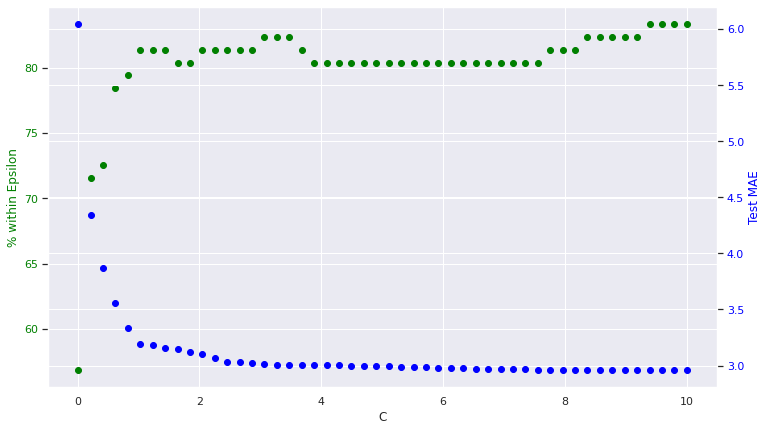

In [ ]:
fig, ax1 = plt.subplots(figsize=(12,7))

color='green'
ax1.set_xlabel('C')
ax1.set_ylabel('% within Epsilon', color=color)
ax1.scatter(c_space, perc_within_eps_list, color=color)
ax1.tick_params(axis='y', labelcolor=color)

color='blue'
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Test MAE', color=color)  # we already handled the x-label with ax1
ax2.scatter(c_space, test_mae_list, color=color)
ax2.tick_params(axis='y', labelcolor=color)


plt.show()

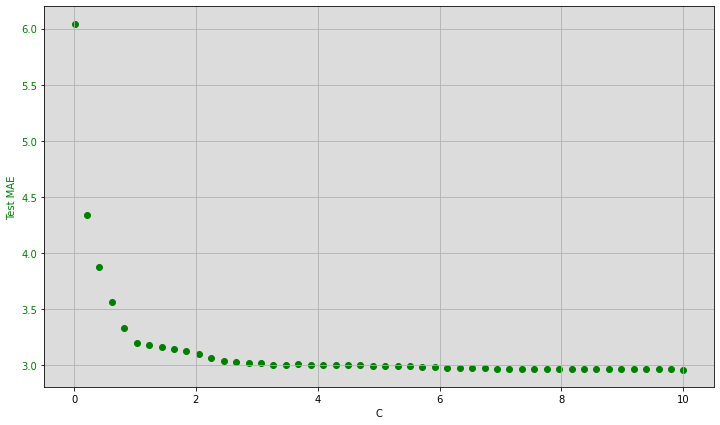

In [ ]:
fig, ax1 = plt.subplots(figsize=(12,7))


color='green'
ax1.set_facecolor("gainsboro")
ax1.set_xlabel('C')
ax1.set_ylabel('Test MAE', color=color)
ax1.scatter(c_space, test_mae_list, color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.grid()
plt.show()

In [ ]:
m = max(perc_within_eps_list)
inds = [i for i, j in enumerate(perc_within_eps_list) if j == m]
C = c_space[inds[0]]

print("best C =", C)

best C = 9.388367346938775


# GridSearchCV

### For Epsilon

In [ ]:
parameters = {'epsilon': np.linspace(0.01, 10)}
model_grid = SVR(kernel = 'rbf',C = 9.3)
grid_svr = GridSearchCV(model_grid, parameters, scoring = "neg_mean_absolute_error",cv = 5)
grid_svr.fit(X_train,Y_train)
print(grid_svr.best_params_)

{'epsilon': 1.6410204081632653}


### For Gamma

In [ ]:
params = {"gamma": ['scale','auto']}
model_grid2 = SVR(kernel = 'rbf',C = 9.3,epsilon = 1.64)
grid_svr2 = GridSearchCV(model_grid2, params, scoring = "neg_mean_absolute_error", cv = 5)
grid_svr2.fit(X_train,Y_train)
print(grid_svr2.best_params_)

{'gamma': 'auto'}


# Final Model

In [ ]:
#fitting model with best params
model_final = SVR(kernel = "rbf", C = 9.38, epsilon = 1.64, gamma = 'auto')
model_final.fit(X_train,Y_train)

SVR(C=9.38, epsilon=1.64, gamma='auto')

In [ ]:
final_pred = model_final.predict(X_test)

# Model Evaluation
print('R^2:',metrics.r2_score(Y_test, final_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(Y_test, final_pred))*(len(Y_test)-1)/(len(Y_test)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(Y_test, final_pred))
print('MSE:',metrics.mean_squared_error(Y_test, final_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test, final_pred)))

R^2: 0.8111835425490397
Adjusted R^2: 0.8073690686611414
MAE: 2.9067143682192236
MSE: 14.783170928884937
RMSE: 3.844888935832209
